<a href="https://colab.research.google.com/github/MagEk1511/Atomic-Hack-Continue/blob/main/catboost%2Bcorr_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Обработка данных и выделение фичей

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 26.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from sklearn.preprocessing import FunctionTransformer

In [ ]:
data = pd.read_excel("1400.xlsx")
data.head()

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures
0,1007-Ya-213,2.7,500.0,185.185185,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,50.0
1,1007-Ya-213,0.7,447.0,638.571429,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,51.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,53.0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0


In [ ]:
def smile2mol(smile):
  return Chem.MolFromSmiles(smile)

def get_mol_features(molecule, descriptors):
  map = {}
  for desc_name, desc_fun in descriptors.items():
    map[desc_name] = [desc_fun(molecule)]

  return map

def featuresDataset(descriptors, data, target):
  target_cols = target
  features_cols = list(descriptors.keys())
  columns = features_cols + target_cols
  output_dataset = pd.DataFrame(columns = columns)
  for mol_row in data.values:
    mol_row = {data.columns[i]: mol_row[i] for i in range(len(data.columns))}
    mol = smile2mol(mol_row['SMILES'])
    features = get_mol_features(mol, descriptors)
    for target in target_cols:
      features[target] = [mol_row[target]]
    features = pd.DataFrame(data=features, columns=columns)
    output_dataset = pd.concat([output_dataset, features], ignore_index=True)
  return output_dataset

In [ ]:
descriptors = {
    "Descriptors.MolWt": Descriptors.MolWt,
    "Descriptors.MolLogP": Descriptors.MolLogP,
    "Descriptors.NumHDonors": Descriptors.NumHDonors,
    "Descriptors.NumHAcceptors": Descriptors.NumHAcceptors,
    "Descriptors.NumRotatableBonds": Descriptors.NumRotatableBonds,
    "Descriptors.NumAromaticRings": Descriptors.NumAromaticRings
}

all_descriptors = {desk[0]:desk[1] for desk in Descriptors._descList}


print(get_mol_features(smile2mol('O'), descriptors))

{'Descriptors.MolWt': [18.015], 'Descriptors.MolLogP': [-0.8247], 'Descriptors.NumHDonors': [0], 'Descriptors.NumHAcceptors': [0], 'Descriptors.NumRotatableBonds': [0], 'Descriptors.NumAromaticRings': [0]}


In [ ]:
data.values

array([['1007-Ya-213', 2.7, 500.0, ..., 32.59,
        'OCC\\N=C(\\[C@]12C)C[C@@H](C1(C)C)CC2', 50.0],
       ['1007-Ya-213', 0.7, 447.0, ..., 32.59,
        'OCC\\N=C(\\[C@]12C)C[C@@H](C1(C)C)CC2', 51.0],
       ['1008-Ya-187', 9.9, 144.0, ..., 15.6,
        'CCN(CC)CC\\N=C(\\[C@@]12C)C[C@H](C1(C)C)CC2', 52.0],
       ...,
       ['CHEMBL4205814', 0.3, 4733.9, ..., 124.74,
        'COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])=O)ccc3Oc(cc4)ccc4N',
        nan],
       ['CHEMBL4212064', 0.7, 3662.8, ..., 89.49,
        'c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc(cc3)OC', nan],
       ['CHEMBL4452992', 0.1, 37646.0, ..., 126.57,
        'CCC(CC)O[C@H](C=C1C(=O)O)[C@H](NC(=O)C)[C@H](C1)Nc(c2N)nccc2',
        nan]], dtype=object)

In [ ]:
target = ['SI']
features = list(all_descriptors.keys())
features_dataset = featuresDataset(all_descriptors, data, target)

[07:11:32] Conflicting single bond directions around double bond at index 55.
[07:11:32]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [ ]:
features_dataset.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,SI
0,8.803737,8.803737,0.185194,0.185194,0.719980,195.306,174.138,195.162314,80,0,...,0,0,0,0,0,0,0,0,0,185.185185
1,8.803737,8.803737,0.185194,0.185194,0.719980,195.306,174.138,195.162314,80,0,...,0,0,0,0,0,0,0,0,0,638.571429
2,4.983958,4.983958,0.389807,0.389807,0.727487,250.430,220.190,250.240899,104,0,...,0,0,0,0,0,0,0,0,0,14.545455
3,4.888403,4.888403,0.392837,0.392837,0.716719,222.376,196.168,222.209599,92,0,...,0,0,0,0,0,0,0,0,0,60.240964
4,11.775123,11.775123,0.079097,-0.079097,0.707806,239.359,214.159,239.188529,98,0,...,0,0,0,0,0,0,0,0,0,3.629442


Проверка словарей на бесполезные фичи

In [ ]:
unique_values_dict = {}
for col in features_dataset:
  unique_values_dict[col] = features_dataset[col].unique()

In [ ]:
useless_features = []
for key, value in unique_values_dict.items():
  if len(value) == 1:
    useless_features.append(key)

In [ ]:
useless_features

['NumRadicalElectrons',
 'SMR_VSA8',
 'SlogP_VSA9',
 'fr_azide',
 'fr_barbitur',
 'fr_benzodiazepine',
 'fr_diazo',
 'fr_dihydropyridine',
 'fr_isocyan',
 'fr_isothiocyan',
 'fr_lactam',
 'fr_nitroso',
 'fr_phos_acid',
 'fr_phos_ester',
 'fr_prisulfonamd',
 'fr_thiocyan']

In [ ]:
useful_features = list(set(features) - set(useless_features))
useful_features_dataset = features_dataset.drop(useless_features, axis=1)

In [ ]:
useful_features_dataset.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,SI
0,8.803737,8.803737,0.185194,0.185194,0.719980,195.306,174.138,195.162314,80,0.062642,...,0,0,0,0,0,0,0,0,0,185.185185
1,8.803737,8.803737,0.185194,0.185194,0.719980,195.306,174.138,195.162314,80,0.062642,...,0,0,0,0,0,0,0,0,0,638.571429
2,4.983958,4.983958,0.389807,0.389807,0.727487,250.430,220.190,250.240899,104,0.051591,...,0,0,0,0,0,0,0,0,0,14.545455
3,4.888403,4.888403,0.392837,0.392837,0.716719,222.376,196.168,222.209599,92,0.051567,...,0,0,0,0,0,0,0,0,0,60.240964
4,11.775123,11.775123,0.079097,-0.079097,0.707806,239.359,214.159,239.188529,98,0.319916,...,0,0,0,0,0,0,0,0,0,3.629442


In [ ]:
useful_features_dataset.to_csv('/content/useful_features_dataset.csv')

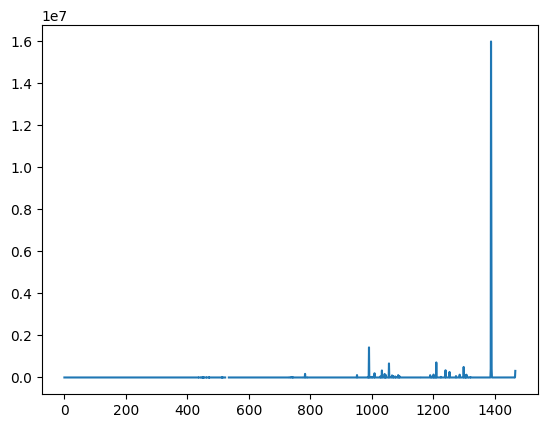

In [ ]:
import matplotlib.pyplot as plt

plt.plot(features_dataset[target])

Изучение корелляции фичей

<ipython-input-18-4d6a9cf98a28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = useful_features_dataset.corr()


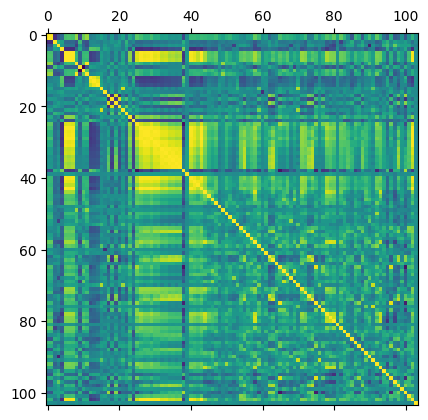

In [ ]:
import matplotlib.pyplot as plt
corr = useful_features_dataset.corr()
plt.matshow(corr)
plt.show()

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    return drop_cols

In [ ]:
useless_features += list(set(remove_collinear_features(useful_features_dataset, 0.9)))
useful_features = list(set(features) - set(useless_features))

<ipython-input-19-bdbaa9eca96e>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = x.corr()


#Создание датасета

In [ ]:
useful_features_dataset = useful_features_dataset.dropna()

In [ ]:
X = useful_features_dataset[useful_features]
y = useful_features_dataset[target]

In [ ]:
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8)

In [ ]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor()

In [ ]:
model.fit(X_train, y_train)

Learning rate set to 0.041857
0:	learn: 0.9895719	total: 123ms	remaining: 2m 3s
1:	learn: 0.9797096	total: 149ms	remaining: 1m 14s
2:	learn: 0.9699687	total: 204ms	remaining: 1m 7s
3:	learn: 0.9599037	total: 242ms	remaining: 1m
4:	learn: 0.9499244	total: 295ms	remaining: 58.8s
5:	learn: 0.9416867	total: 385ms	remaining: 1m 3s
6:	learn: 0.9318981	total: 441ms	remaining: 1m 2s
7:	learn: 0.9222458	total: 502ms	remaining: 1m 2s
8:	learn: 0.9127014	total: 530ms	remaining: 58.3s
9:	learn: 0.9032631	total: 568ms	remaining: 56.2s
10:	learn: 0.8939097	total: 631ms	remaining: 56.7s
11:	learn: 0.8846669	total: 679ms	remaining: 55.9s
12:	learn: 0.8755253	total: 700ms	remaining: 53.2s
13:	learn: 0.8664816	total: 723ms	remaining: 50.9s
14:	learn: 0.8575311	total: 746ms	remaining: 49s
15:	learn: 0.8486714	total: 768ms	remaining: 47.2s
16:	learn: 0.8399192	total: 803ms	remaining: 46.4s
17:	learn: 0.8312675	total: 843ms	remaining: 46s
18:	learn: 0.8227085	total: 888ms	remaining: 45.8s
19:	learn: 0.8142

In [ ]:
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

0.0020909131649618513

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

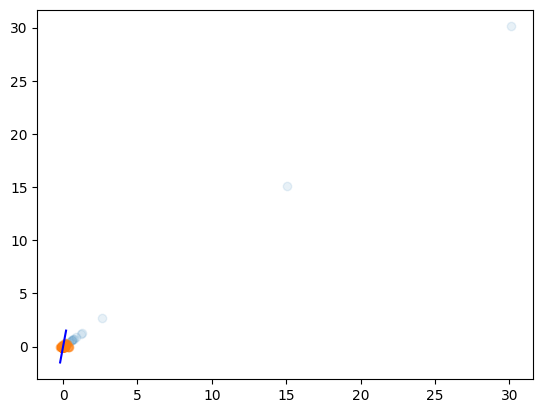

In [ ]:
plt.scatter(np.array(y_pred_train.tolist()).flatten(), np.array(y_train.tolist()).flatten(), alpha=0.1)
plt.scatter(np.array(y_pred_test.tolist()).flatten(), np.array(y_test.tolist()).flatten(), alpha=0.5)
plt.plot([-0.2, 0.2], [-1.5,1.5], c="b")